In [133]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.builtins import * 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

inequalitydf = pd.read_csv("countries_by_activityinequality.csv")
obesitydf = pd.read_csv("countries_by_obesity.csv")
stepsdf = pd.read_csv("countries_by_steps.csv")

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     84.87
Date:                Sun, 09 May 2021   Prob (F-statistic):           0.000253
Time:                        18:03:29   Log-Likelihood:                 21.419
No. Observations:                   7   AIC:                            -38.84
Df Residuals:                       5   BIC:                            -38.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2093      0.013     16.275      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


,gender_x,age,n_x,steps_mean_x,lower.ci_x,upper.ci_x,gender_y,n_y,steps_mean_y,lower.ci_y,upper.ci_y,diff,realAge
0,male,"[15, 20)",11155,5648.561829,5600.838610,5697.489948,female,19215,4551.341208,4521.125536,4581.189269,0.241076,17.5
1,male,"[20, 30)",41788,6073.777084,6048.285273,6100.303470,female,48081,4802.858302,4781.922381,4824.385858,0.264617,25.0
2,male,"[30, 40)",51778,5723.533779,5700.227412,5746.168899,female,33929,4341.733990,4317.673797,4368.470428,0.318260,35.0
3,male,"[40, 50)",40001,5507.213907,5479.784404,5532.650650,female,23187,4172.473992,4143.416266,4202.416600,0.319892,45.0
4,male,"[50, 60)",22260,5296.647743,5262.000247,5332.236147,female,16632,3984.659927,3944.297927,4021.778624,0.329260,55.0
5,male,"[60, 70)",10660,4921.713571,4869.370965,4971.555103,female,7164,3606.074293,3550.815645,3660.971380,0.364840,65.0
6,male,"[70, inf)",3058,4154.718173,4063.552936,4244.676852,female,1611,2990.115500,2878.860777,3095.178132,0.389484,75.0


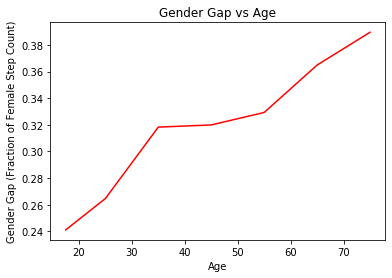

In [209]:
ageGenderDf = pd.read_csv("steps_by_age_gender_20170508.csv")
ageGenderDfMale = ageGenderDf[ageGenderDf['gender'] == 'male']
ageGenderDfFemale = ageGenderDf[ageGenderDf['gender'] == 'female']
allAgeDf = ageGenderDfMale.merge(ageGenderDfFemale, how='left', on='age')
allAgeDf['diff'] = (allAgeDf['steps_mean_x'] - allAgeDf['steps_mean_y'])/allAgeDf['steps_mean_y']
allAgeDf['realAge'] = [17.5, 25, 35, 45, 55, 65, 75]
x = allAgeDf["realAge"].astype(str).str.rstrip('%').astype('float')
y = allAgeDf["diff"].astype(str).str.rstrip('%').astype('float')
plt.plot(x, y, c="red")
plt.ylabel("Gender Gap (Fraction of Female Step Count per Day)")
plt.xlabel("Age")
plt.title("Gender Gap vs Age")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())
allAgeDf

Text(0.5, 1.0, 'Activity vs Age (Males)')

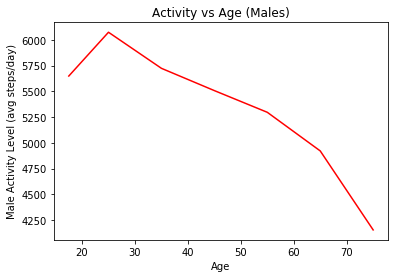

In [211]:
x = allAgeDf["realAge"].astype(str).str.rstrip('%').astype('float')
y = allAgeDf["steps_mean_x"].astype(str).str.rstrip('%').astype('float')
plt.plot(x, y, c="red")
plt.ylabel("Male Activity Level (avg steps/day)")
plt.xlabel("Age")
plt.title("Activity vs Age (Males)")

Text(0.5, 1.0, 'Activity vs Age (Females)')

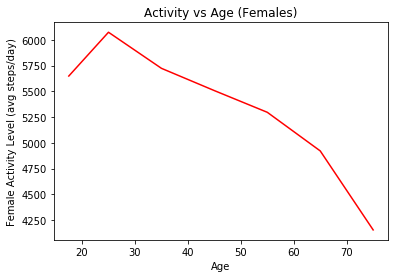

In [212]:
x = allAgeDf["realAge"].astype(str).str.rstrip('%').astype('float')
y = allAgeDf["steps_mean_x"].astype(str).str.rstrip('%').astype('float')
plt.plot(x, y, c="red")
plt.ylabel("Female Activity Level (avg steps/day)")
plt.xlabel("Age")
plt.title("Activity vs Age (Females)")

In [135]:
obesitydf

,rank,country,fraction_obese
0,1,China,3.7%
1,2,Japan,5.5%
2,3,Hong Kong,5.6%
3,4,South Korea,5.9%
4,5,Taiwan,6.6%
5,6,Ukraine,8.6%
6,7,France,8.9%
7,8,Italy,9.0%
8,9,Switzerland,9.1%
9,10,Thailand,9.1%


In [136]:
stepsdf

,rank,country,steps
0,1,Hong Kong,6880
1,2,China,6189
2,3,Ukraine,6107
3,4,Japan,6010
4,5,Russia,5969
5,6,Spain,5936
6,7,Sweden,5863
7,8,South Korea,5755
8,9,Singapore,5674
9,10,Switzerland,5512


In [137]:
twodf =inequalitydf.merge(obesitydf, how='left', on='country')

In [138]:
alldf = twodf.merge(stepsdf, how='left', on='country')

In [139]:
alldf

,rank_x,country,activity_inequality,rank_y,fraction_obese,rank,steps
0,1,Hong Kong,22.2,3,5.6%,1,6880
1,2,China,24.5,1,3.7%,2,6189
2,3,Sweden,24.6,21,12.6%,7,5863
3,4,South Korea,24.7,4,5.9%,8,5755
4,5,Czech Republic,24.8,24,13.1%,11,5508
5,6,Japan,24.8,2,5.5%,4,6010
6,7,Singapore,24.9,11,9.3%,9,5674
7,8,Norway,25.2,25,13.2%,18,5246
8,9,Ukraine,25.2,6,8.6%,3,6107
9,10,Netherlands,26.1,14,10.4%,23,5110


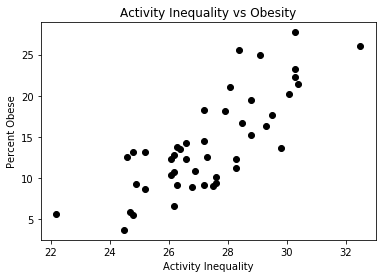

In [234]:
x = alldf["activity_inequality"]
y = alldf["fraction_obese"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='black')
plt.xlabel("Activity Inequality")
plt.ylabel("Percent Obese")
plt.title("Activity Inequality vs Obesity")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()

In [141]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         fraction_obese   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     72.00
Date:                Sun, 09 May 2021   Prob (F-statistic):           8.20e-11
Time:                        17:07:27   Log-Likelihood:                -124.50
No. Observations:                  46   AIC:                             253.0
Df Residuals:                      44   BIC:                             256.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -48.9556    

                            OLS Regression Results                            
Dep. Variable:             steps_mean   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                   0.01561
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.901
Time:                        20:30:57   Log-Likelihood:                -365.93
No. Observations:                  46   AIC:                             735.9
Df Residuals:                      44   BIC:                             739.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5133.5425    766.554      6.697      0.0

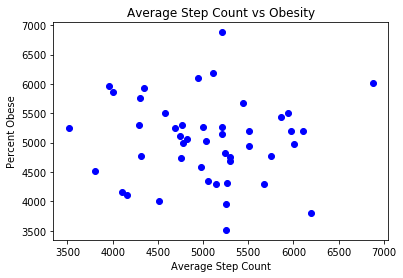

In [233]:
z = alldf["steps"]
plt.scatter(z, y, color="blue")
plt.xlabel("Average Step Count")
plt.ylabel("Percent Obese")
plt.title("Average Step Count vs Obesity")
model2 = sm.OLS(y.astype(float), sm.add_constant(z.astype(float))).fit()
print(model2.summary())

In [143]:
genderdf = pd.read_csv("countries_by_rel_gender_gap.csv")

In [144]:
genderdf

,rank,country,gender_gap_(m-f)/m
0,1,Sweden,4.1%
1,2,Ukraine,4.8%
2,3,Russia,6.9%
3,4,Hungary,7.2%
4,5,Norway,7.6%
5,6,Italy,7.7%
6,7,Czech Republic,7.8%
7,8,Finland,8.3%
8,9,China,9.8%
9,10,France,9.8%


In [145]:
alldf = alldf.merge(genderdf, how='left', on='country')

In [146]:
alldf

,rank_x,country,activity_inequality,rank_y,fraction_obese,rank_x,steps,rank_y,gender_gap_(m-f)/m
0,1,Hong Kong,22.2,3,5.6%,1,6880,20,12.7%
1,2,China,24.5,1,3.7%,2,6189,9,9.8%
2,3,Sweden,24.6,21,12.6%,7,5863,1,4.1%
3,4,South Korea,24.7,4,5.9%,8,5755,11,9.9%
4,5,Czech Republic,24.8,24,13.1%,11,5508,7,7.8%
5,6,Japan,24.8,2,5.5%,4,6010,25,14.9%
6,7,Singapore,24.9,11,9.3%,9,5674,23,14.4%
7,8,Norway,25.2,25,13.2%,18,5246,5,7.6%
8,9,Ukraine,25.2,6,8.6%,3,6107,2,4.8%
9,10,Netherlands,26.1,14,10.4%,23,5110,30,16.3%


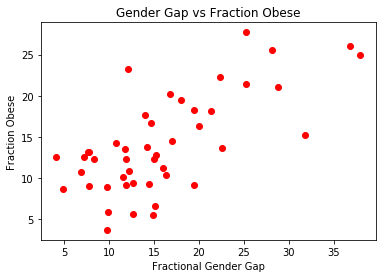

In [249]:
x = alldf["gender_gap_(m-f)/m"].astype(str).str.rstrip('%').astype('float')
y = alldf["fraction_obese"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="red")
plt.xlabel("Fractional Gender Gap")
plt.ylabel("Fraction Obese")
plt.title("Gender Gap vs Fraction Obese")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()

In [148]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         fraction_obese   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.32e-07
Time:                        17:07:29   Log-Likelihood:                -132.08
No. Observations:                  46   AIC:                             268.2
Df Residuals:                      44   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.8283      1

                             OLS Regression Results                            
Dep. Variable:     activity_inequality   R-squared:                       0.429
Model:                             OLS   Adj. R-squared:                  0.416
Method:                  Least Squares   F-statistic:                     32.99
Date:                 Sun, 09 May 2021   Prob (F-statistic):           8.02e-07
Time:                         21:03:06   Log-Likelihood:                -84.512
No. Observations:                   46   AIC:                             173.0
Df Residuals:                       44   BIC:                             176.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 24.6

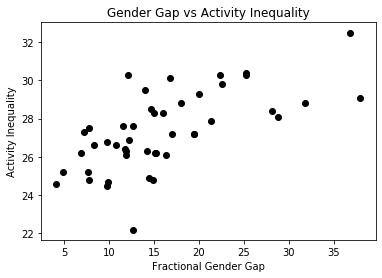

In [248]:
x = alldf["gender_gap_(m-f)/m"].astype(str).str.rstrip('%').astype('float')
y = alldf["activity_inequality"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="black")
plt.xlabel("Fractional Gender Gap")
plt.ylabel("Activity Inequality")
plt.title("Gender Gap vs Activity Inequality")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [150]:
x = alldf["gender_gap_(m-f)/m"].astype(str).str.rstrip('%').astype('float')
y = alldf["activity_inequality"].astype(str).str.rstrip('%').astype('float')
z = alldf["fraction_obese"].astype(str).str.rstrip('%').astype('float')
alldf["gender_gap(m-f)/m"] = x
alldf["activity_inequality"] = y
alldf["fraction_obese"] = z
model = smf.ols(formula="fraction_obese ~ Q('activity_inequality') + Q('gender_gap_(m-f)/m')", data=alldf).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         fraction_obese   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     2.055
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.307
Time:                        17:07:29   Log-Likelihood:                -68.738
No. Observations:                  46   AIC:                             223.5
Df Residuals:                       3   BIC:                             302.1
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [151]:
citydf = pd.read_csv("activity_inequality_walkscore_uscities_wincome_20170508.csv")
citydf

,walkability,city,gini,median_household_income_2015,median_household_income_2015_binned
0,74.8,"Chicago, IL",0.238144,50702,"(44804, 51407]"
1,87.6,"New York, NY",0.207054,55752,"(51407, 58807]"
2,44.2,"Houston, TX",0.277100,48064,"(44804, 51407]"
3,83.9,"San Francisco, CA",0.226544,92094,"(58807, 112263]"
4,63.9,"Los Angeles, CA",0.250664,52024,"(51407, 58807]"
...,...,...,...,...,...
64,36.0,"Tulsa, OK",0.285110,43322,"[28831, 44804]"
65,34.6,"Arlington, TX",0.309604,53487,"(51407, 58807]"
66,50.6,"Anaheim, CA",0.278900,63104,"(58807, 112263]"
67,27.6,"Henderson, NV",0.273709,64035,"(58807, 112263]"


In [152]:
citydfBottom = citydf[citydf['median_household_income_2015_binned'] == '[28831, 44804]']
citydfSecond = citydf[citydf['median_household_income_2015_binned'] == '(44804, 51407]']
citydfThird = citydf[citydf['median_household_income_2015_binned'] == '(51407, 58807]']
citydfTop = citydf[citydf['median_household_income_2015_binned'] == '(58807, 112263]']
citydfTop

,walkability,city,gini,median_household_income_2015,median_household_income_2015_binned
3,83.9,"San Francisco, CA",0.226544,92094,"(58807, 112263]"
5,48.5,"San Diego, CA",0.268068,67871,"(58807, 112263]"
6,35.4,"Austin, TX",0.265808,62250,"(58807, 112263]"
8,48.1,"San Jose, CA",0.264018,91451,"(58807, 112263]"
11,70.8,"Seattle, WA",0.245666,80349,"(58807, 112263]"
16,62.8,"Portland, OR",0.270600,60892,"(58807, 112263]"
17,74.1,"Washington, DC",0.225478,75628,"(58807, 112263]"
48,36.4,"Plano, TX",0.263384,83769,"(58807, 112263]"
50,43.9,"Irvine, CA",0.262133,93781,"(58807, 112263]"
51,62.6,"Honolulu, HI",0.263759,64658,"(58807, 112263]"


                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     88.74
Date:                Sun, 09 May 2021   Prob (F-statistic):           6.81e-14
Time:                        21:07:03   Log-Likelihood:                 198.01
No. Observations:                  69   AIC:                            -392.0
Df Residuals:                      67   BIC:                            -387.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3142      0.005     61.020      

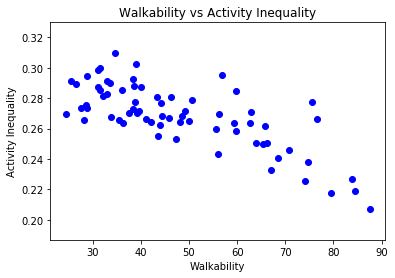

In [250]:
x = citydf["walkability"].astype(str).str.rstrip('%').astype('float')
y = citydf["gini"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="blue")
plt.xlabel("Walkability")
plt.ylabel("Activity Inequality")
plt.title("Walkability vs Activity Inequality")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     7.788
Date:                Sun, 09 May 2021   Prob (F-statistic):            0.00684
Time:                        17:07:30   Log-Likelihood:                 172.70
No. Observations:                  69   AIC:                            -341.4
Df Residuals:                      67   BIC:                            -336.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

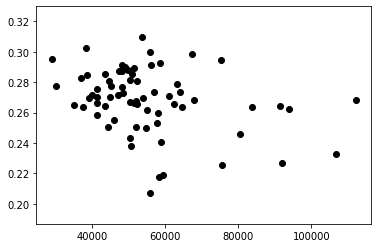

In [154]:
x = citydf["median_household_income_2015"].astype(str).str.rstrip('%').astype('float')
y = citydf["gini"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="black")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [155]:
weartimedf = pd.read_csv("/Users/shivasaravanan/ORF387Project/data/weartime_by_country_20170508.csv")

In [156]:
weartimedf

,country,steps_mean,weartime_mean,must_label_ind
0,Japan,6009.770680,14.379112,True
1,Saudi Arabia,3806.588076,15.621038,True
2,United Kingdom,5443.736848,13.621738,True
3,United States,4773.860795,14.108060,True
4,Australia,4941.485728,13.073280,False
5,Belgium,4977.854804,14.050382,False
6,Brazil,4288.564768,13.762269,False
7,Canada,4819.386553,13.824930,False
8,Chile,5204.170613,13.744080,False
9,China,6188.650349,13.339774,False


                            OLS Regression Results                            
Dep. Variable:             steps_mean   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.3282
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.570
Time:                        20:27:04   Log-Likelihood:                -365.77
No. Observations:                  46   AIC:                             735.5
Df Residuals:                      44   BIC:                             739.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6403.5030   2384.530      2.685

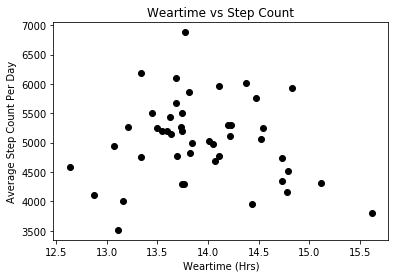

In [232]:
x = weartimedf["weartime_mean"].astype(str).str.rstrip('%').astype('float')
y = weartimedf["steps_mean"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="black")
plt.xlabel("Weartime (Hrs)")
plt.ylabel("Average Step Count Per Day")
plt.title("Weartime vs Step Count")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [158]:
countryagedf = pd.read_csv("/Users/shivasaravanan/ORF387Project/data/obesity_gini_country_age_group_check_20150511.csv")
countryagedf

,country,steps_gini,obesity_mean,age_cat
0,Australia,0.303666,0.214487,All
1,Belgium,0.276203,0.093736,All
2,Brazil,0.271752,0.182918,All
3,Canada,0.302882,0.223293,All
4,Chile,0.262558,0.138356,All
...,...,...,...,...
271,Turkey,0.284917,0.268041,"Age [50, 100)"
272,Ukraine,0.277134,0.200000,"Age [50, 100)"
273,United Arab Emirates,0.290874,0.240000,"Age [50, 100)"
274,United Kingdom,0.313772,0.267202,"Age [50, 100)"


In [159]:
countryagedf1020 = countryagedf[countryagedf['age_cat'] == 'Age [10, 20)']
countryagedf1020

,country,steps_gini,obesity_mean,age_cat
46,Australia,0.280803,0.050233,"Age [10, 20)"
47,Belgium,0.277661,0.020833,"Age [10, 20)"
48,Brazil,0.261768,0.036842,"Age [10, 20)"
49,Canada,0.283175,0.098849,"Age [10, 20)"
50,Chile,0.232871,0.016949,"Age [10, 20)"
51,China,0.279883,0.023030,"Age [10, 20)"
52,Czech Republic,0.237495,0.040541,"Age [10, 20)"
53,Denmark,0.243638,0.018018,"Age [10, 20)"
54,Egypt,0.282154,0.105769,"Age [10, 20)"
55,Finland,0.236326,0.051095,"Age [10, 20)"


                            OLS Regression Results                            
Dep. Variable:           obesity_mean   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     37.85
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.01e-07
Time:                        20:40:46   Log-Likelihood:                 103.59
No. Observations:                  46   AIC:                            -203.2
Df Residuals:                      44   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1719      0.037     -4.691      0.0

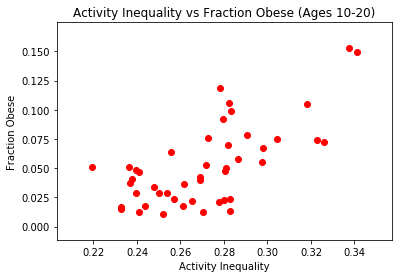

In [236]:
x = countryagedf1020["steps_gini"].astype(str).str.rstrip('%').astype('float')
y = countryagedf1020["obesity_mean"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="red")
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Fraction Obese (Ages 10-20)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [161]:
countryagedf2030 = countryagedf[countryagedf['age_cat'] == 'Age [20, 30)']
countryagedf2030

,country,steps_gini,obesity_mean,age_cat
92,Australia,0.284429,0.152495,"Age [20, 30)"
93,Belgium,0.244844,0.061002,"Age [20, 30)"
94,Brazil,0.272400,0.135922,"Age [20, 30)"
95,Canada,0.274170,0.157447,"Age [20, 30)"
96,Chile,0.261721,0.081250,"Age [20, 30)"
97,China,0.224915,0.029365,"Age [20, 30)"
98,Czech Republic,0.232691,0.068376,"Age [20, 30)"
99,Denmark,0.228598,0.076271,"Age [20, 30)"
100,Egypt,0.283645,0.160804,"Age [20, 30)"
101,Finland,0.247846,0.131455,"Age [20, 30)"


                            OLS Regression Results                            
Dep. Variable:           obesity_mean   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     27.32
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.54e-06
Time:                        20:41:45   Log-Likelihood:                 85.420
No. Observations:                  46   AIC:                            -166.8
Df Residuals:                      44   BIC:                            -163.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2132      0.059     -3.591      0.0

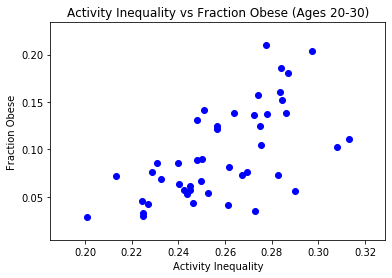

In [238]:
x = countryagedf2030["steps_gini"].astype(str).str.rstrip('%').astype('float')
y = countryagedf2030["obesity_mean"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="blue")
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Fraction Obese (Ages 20-30)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [163]:
countryagedf3040 = countryagedf[countryagedf['age_cat'] == 'Age [30, 40)']
countryagedf3040

,country,steps_gini,obesity_mean,age_cat
138,Australia,0.293216,0.234393,"Age [30, 40)"
139,Belgium,0.251515,0.092643,"Age [30, 40)"
140,Brazil,0.258420,0.207951,"Age [30, 40)"
141,Canada,0.288047,0.255274,"Age [30, 40)"
142,Chile,0.238138,0.165414,"Age [30, 40)"
143,China,0.227233,0.042802,"Age [30, 40)"
144,Czech Republic,0.242190,0.153179,"Age [30, 40)"
145,Denmark,0.242746,0.146853,"Age [30, 40)"
146,Egypt,0.286341,0.273504,"Age [30, 40)"
147,Finland,0.247718,0.137778,"Age [30, 40)"


                            OLS Regression Results                            
Dep. Variable:           obesity_mean   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     42.29
Date:                Sun, 09 May 2021   Prob (F-statistic):           6.14e-08
Time:                        20:43:29   Log-Likelihood:                 74.020
No. Observations:                  46   AIC:                            -144.0
Df Residuals:                      44   BIC:                            -140.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4386      0.092     -4.791      0.0

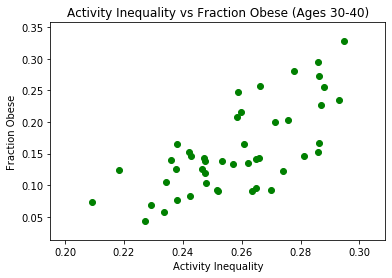

In [239]:
x = countryagedf3040["steps_gini"].astype(str).str.rstrip('%').astype('float')
y = countryagedf3040["obesity_mean"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="green")
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Fraction Obese (Ages 30-40)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [165]:
countryagedf4050 = countryagedf[countryagedf['age_cat'] == 'Age [40, 50)']
countryagedf4050

,country,steps_gini,obesity_mean,age_cat
184,Australia,0.302809,0.289165,"Age [40, 50)"
185,Belgium,0.270686,0.096154,"Age [40, 50)"
186,Brazil,0.255416,0.275316,"Age [40, 50)"
187,Canada,0.298005,0.274007,"Age [40, 50)"
188,Chile,0.258146,0.200000,"Age [40, 50)"
189,China,0.237749,0.068337,"Age [40, 50)"
190,Czech Republic,0.249438,0.241206,"Age [40, 50)"
191,Denmark,0.256501,0.132832,"Age [40, 50)"
192,Egypt,0.337360,0.415094,"Age [40, 50)"
193,Finland,0.271809,0.150376,"Age [40, 50)"


                            OLS Regression Results                            
Dep. Variable:           obesity_mean   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     21.01
Date:                Sun, 09 May 2021   Prob (F-statistic):           3.77e-05
Time:                        20:45:01   Log-Likelihood:                 55.018
No. Observations:                  46   AIC:                            -106.0
Df Residuals:                      44   BIC:                            -102.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4357      0.138     -3.148      0.0

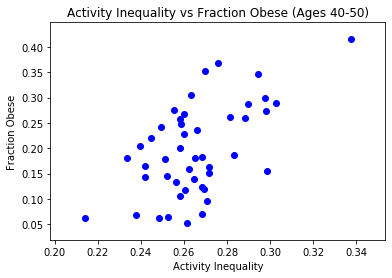

In [240]:
x = countryagedf4050["steps_gini"].astype(str).str.rstrip('%').astype('float')
y = countryagedf4050["obesity_mean"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="blue")
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Fraction Obese (Ages 40-50)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [167]:
countryagedf50100 = countryagedf[countryagedf['age_cat'] == 'Age [50, 100)']
countryagedf50100

,country,steps_gini,obesity_mean,age_cat
230,Australia,0.330612,0.280207,"Age [50, 100)"
231,Belgium,0.312167,0.177358,"Age [50, 100)"
232,Brazil,0.299107,0.177885,"Age [50, 100)"
233,Canada,0.321808,0.287997,"Age [50, 100)"
234,Chile,0.256058,0.224490,"Age [50, 100)"
235,China,0.267513,0.065972,"Age [50, 100)"
236,Czech Republic,0.250694,0.218750,"Age [50, 100)"
237,Denmark,0.298956,0.175549,"Age [50, 100)"
238,Egypt,0.349964,0.325581,"Age [50, 100)"
239,Finland,0.282272,0.080808,"Age [50, 100)"


                            OLS Regression Results                            
Dep. Variable:           obesity_mean   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     8.805
Date:                Sun, 09 May 2021   Prob (F-statistic):            0.00484
Time:                        20:46:44   Log-Likelihood:                 49.983
No. Observations:                  46   AIC:                            -95.97
Df Residuals:                      44   BIC:                            -92.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2509      0.154     -1.630      0.1

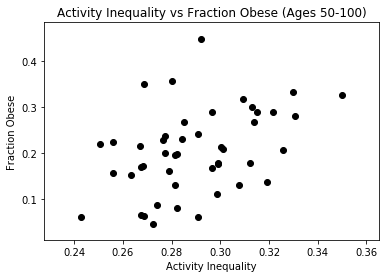

In [241]:
x = countryagedf50100["steps_gini"].astype(str).str.rstrip('%').astype('float')
y = countryagedf50100["obesity_mean"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="black")
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Fraction Obese (Ages 50-100)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.024
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.174
Time:                        21:09:00   Log-Likelihood:                 54.332
No. Observations:                  18   AIC:                            -104.7
Df Residuals:                      16   BIC:                            -102.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2898      0.011     25.629      

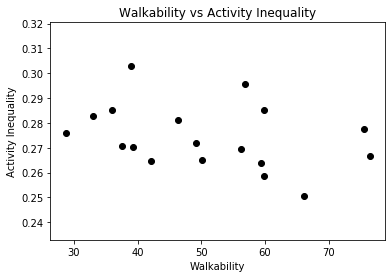

In [251]:
x = citydfBottom["walkability"].astype(str).str.rstrip('%').astype('float')
y = citydfBottom["gini"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="black")
plt.xlabel("Walkability")
plt.ylabel("Activity Inequality")
plt.title("Walkability vs Activity Inequality")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     54.06
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.40e-06
Time:                        21:10:32   Log-Likelihood:                 59.391
No. Observations:                  17   AIC:                            -114.8
Df Residuals:                      15   BIC:                            -113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3240      0.007     46.415      

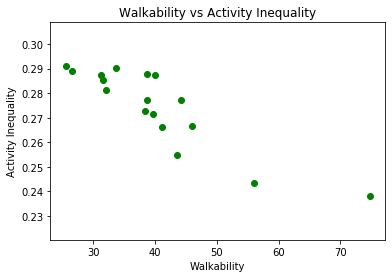

In [252]:
x = citydfSecond["walkability"].astype(str).str.rstrip('%').astype('float')
y = citydfSecond["gini"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="green")
plt.xlabel("Walkability")
plt.ylabel("Activity Inequality")
plt.title("Walkability vs Activity Inequality")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     32.46
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.23e-05
Time:                        21:11:53   Log-Likelihood:                 47.478
No. Observations:                  17   AIC:                            -90.96
Df Residuals:                      15   BIC:                            -89.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3198      0.010     30.460      

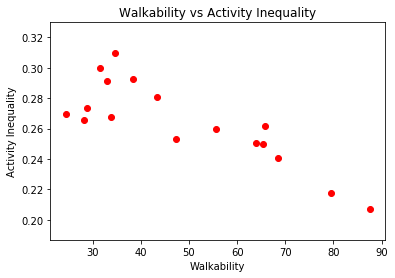

In [254]:
x = citydfThird["walkability"].astype(str).str.rstrip('%').astype('float')
y = citydfThird["gini"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="red")
plt.xlabel("Walkability")
plt.ylabel("Activity Inequality")
plt.title("Walkability vs Activity Inequality")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     42.59
Date:                Sun, 09 May 2021   Prob (F-statistic):           9.59e-06
Time:                        21:13:15   Log-Likelihood:                 51.858
No. Observations:                  17   AIC:                            -99.72
Df Residuals:                      15   BIC:                            -98.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3165      0.009     34.639      

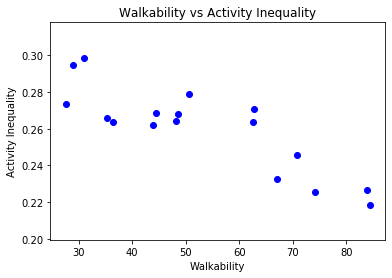

In [255]:
x = citydfTop["walkability"].astype(str).str.rstrip('%').astype('float')
y = citydfTop["gini"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, color="blue")
plt.xlabel("Walkability")
plt.ylabel("Activity Inequality")
plt.title("Walkability vs Activity Inequality")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [173]:
genderBmiDf = pd.read_csv("steps_by_bmi_gender_20170508.csv")

In [174]:
maleBmiDf = genderBmiDf[genderBmiDf['gender'] == 'male']
femaleBmiDf = genderBmiDf[genderBmiDf['gender'] == 'female']
maleBmiDf['bmi_avg'] = [7.5, 16.75, 21.75, 27.5, 32.5, 37.5, 60]
femaleBmiDf['bmi_avg'] = [7.5, 16.75, 21.75, 27.5, 32.5, 37.5, 60]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Step Count')

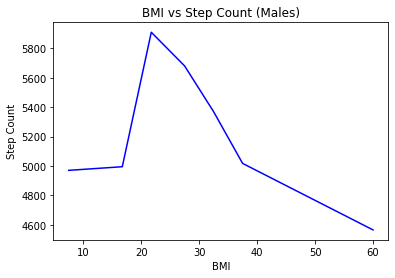

In [206]:
x = maleBmiDf["bmi_avg"].astype(str).str.rstrip('%').astype('float')
y = maleBmiDf["steps_mean"].astype(str).str.rstrip('%').astype('float')
plt.plot(x, y, color="blue")
plt.title("BMI vs Step Count (Males)")
plt.xlabel("BMI")
plt.ylabel("Step Count")

Text(0, 0.5, 'Step Count')

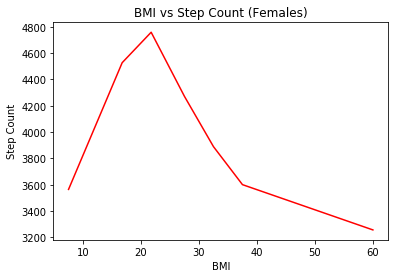

In [205]:
x = femaleBmiDf["bmi_avg"].astype(str).str.rstrip('%').astype('float')
y = femaleBmiDf["steps_mean"].astype(str).str.rstrip('%').astype('float')
plt.plot(x, y, color="red")
plt.title("BMI vs Step Count (Females)")
plt.xlabel("BMI")
plt.ylabel("Step Count")

In [177]:
surveydf = pd.read_sas("/Users/shivasaravanan/ORF387Project/data/PAQ_H.xpt")
surveydf

,SEQN,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,...,PAQ762,PAQ764,PAQ766,PAQ679,PAQ750,PAQ770,PAQ772A,PAQ772B,PAQ772C,PAAQUEX
0,73557.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,73558.0,2.0,NaN,NaN,1.0,1.0,10.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,73559.0,2.0,NaN,NaN,1.0,7.0,30.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,73560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,4.0,NaN,1.0,2.0,NaN,NaN,NaN,1.0
4,73561.0,2.0,NaN,NaN,1.0,2.0,30.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,83727.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9480,83728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9481,83729.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9482,83730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,3.0,NaN,1.0,2.0,NaN,NaN,NaN,1.0


In [178]:
ausSurveyDf = pd.read_csv("/Users/shivasaravanan/ORF387Project/data/AustralianFormattedSurvey.csv")

In [179]:
ausSurveyDf

,MaleAVGPA,MaleAVGEXER,FemaleAVGPA,FemaleAVGEXER
15-17,95.9,83.3,56.5,50.7
18-24,150.7,61.5,75.3,46.4
25-34,133.9,52.5,69.5,47.0
35-44,121.3,46.5,57.9,36.1
45-54,114.9,44.0,64.1,38.7
55-64,91.7,41.0,52.2,36.5
65-74,58.6,40.4,38.8,33.4
75-84,36.5,32.7,28.8,23.9
85+,23.3,20.4,11.8,11.8


                            OLS Regression Results                            
Dep. Variable:                 PAdiff   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.453
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.267
Time:                        21:18:32   Log-Likelihood:                0.65111
No. Observations:                   9   AIC:                             2.698
Df Residuals:                       7   BIC:                             3.092
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9901      0.194      5.109      0.0

,MaleAVGPA,MaleAVGEXER,FemaleAVGPA,FemaleAVGEXER,PAdiff,realAge,EXERdiff
15-17,95.9,83.3,56.5,50.7,0.697345,16.0,0.642998
18-24,150.7,61.5,75.3,46.4,1.001328,21.0,0.325431
25-34,133.9,52.5,69.5,47.0,0.926619,29.5,0.117021
35-44,121.3,46.5,57.9,36.1,1.094991,39.5,0.288089
45-54,114.9,44.0,64.1,38.7,0.792512,49.5,0.136951
55-64,91.7,41.0,52.2,36.5,0.756705,59.5,0.123288
65-74,58.6,40.4,38.8,33.4,0.510309,69.5,0.209581
75-84,36.5,32.7,28.8,23.9,0.267361,79.5,0.368201
85+,23.3,20.4,11.8,11.8,0.974576,90.0,0.728814


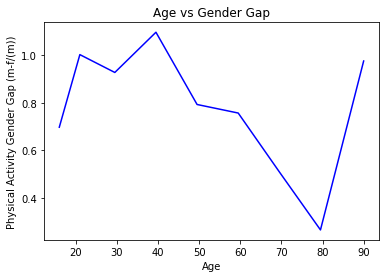

In [260]:
ausSurveyDf['PAdiff'] = (ausSurveyDf['MaleAVGPA'] - ausSurveyDf['FemaleAVGPA'])/(ausSurveyDf['FemaleAVGPA'])
ausSurveyDf['realAge'] = [16, 21, 29.5, 39.5, 49.5, 59.5, 69.5, 79.5, 90]
x = ausSurveyDf["realAge"].astype(str).str.rstrip('%').astype('float')
y = ausSurveyDf["PAdiff"].astype(str).str.rstrip('%').astype('float')
plt.plot(x, y, c="blue")
plt.xlabel("Age")
plt.ylabel("Physical Activity Gender Gap (m-f/(m))")
plt.title("Age vs Gender Gap")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())
ausSurveyDf

In [181]:
ausSurveyDf['EXERdiff'] = (ausSurveyDf['MaleAVGEXER'] - ausSurveyDf['FemaleAVGEXER'])/(ausSurveyDf['FemaleAVGEXER'])

                            OLS Regression Results                            
Dep. Variable:               EXERdiff   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.116
Method:                 Least Squares   F-statistic:                    0.1687
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.694
Time:                        21:18:51   Log-Likelihood:                 1.3473
No. Observations:                   9   AIC:                             1.305
Df Residuals:                       7   BIC:                             1.700
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2605      0.179      1.452      0.1

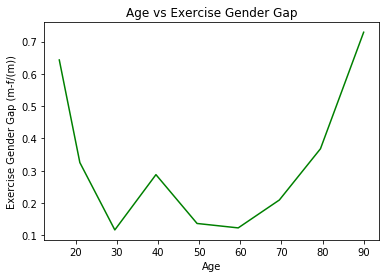

In [261]:
x = ausSurveyDf["realAge"].astype(str).str.rstrip('%').astype('float')
y = ausSurveyDf["EXERdiff"].astype(str).str.rstrip('%').astype('float')
plt.plot(x, y, c="green")
plt.xlabel("Age")
plt.ylabel("Exercise Gender Gap (m-f/(m))")
plt.title("Age vs Exercise Gender Gap")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     obesity_mean_gender_resampled   R-squared:                       0.534
Model:                                       OLS   Adj. R-squared:                  0.523
Method:                            Least Squares   F-statistic:                     50.40
Date:                           Sun, 09 May 2021   Prob (F-statistic):           8.18e-09
Time:                                   20:49:02   Log-Likelihood:                 82.835
No. Observations:                             46   AIC:                            -161.7
Df Residuals:                                 44   BIC:                            -158.0
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

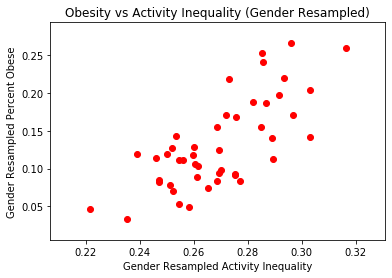

In [242]:
ctdf = pd.read_csv("/Users/shivasaravanan/ORF387Project/data/country_statistics_n46_20170511.csv")
x = ctdf["steps_gini_gender_resampled"]
y = ctdf["obesity_mean_gender_resampled"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='red')
plt.xlabel("Gender Resampled Activity Inequality")
plt.ylabel("Gender Resampled Percent Obese")
plt.title("Obesity vs Activity Inequality (Gender Resampled)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     obesity_mean_gender_resampled   R-squared:                       0.622
Model:                                       OLS   Adj. R-squared:                  0.610
Method:                            Least Squares   F-statistic:                     49.41
Date:                           Sun, 09 May 2021   Prob (F-statistic):           8.19e-08
Time:                                   20:52:24   Log-Likelihood:                 59.267
No. Observations:                             32   AIC:                            -114.5
Df Residuals:                                 30   BIC:                            -111.6
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

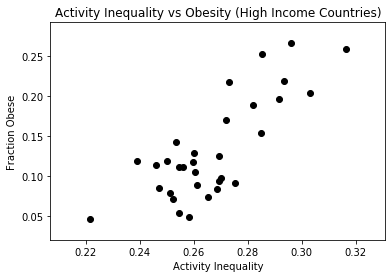

In [243]:
highincomedf = ctdf[ctdf["income_group"] == "High income"]
x = highincomedf["steps_gini_gender_resampled"]
y = highincomedf["obesity_mean_gender_resampled"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='black')
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Obesity (High Income Countries)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     obesity_mean_gender_resampled   R-squared:                       0.389
Model:                                       OLS   Adj. R-squared:                  0.338
Method:                            Least Squares   F-statistic:                     7.629
Date:                           Sun, 09 May 2021   Prob (F-statistic):             0.0172
Time:                                   20:54:32   Log-Likelihood:                 25.415
No. Observations:                             14   AIC:                            -46.83
Df Residuals:                                 12   BIC:                            -45.55
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

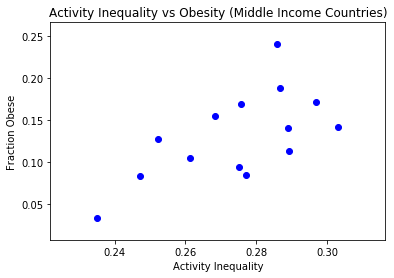

In [244]:
middleincomedf = ctdf[ctdf["income_group"] == "Middle income"]
x = middleincomedf["steps_gini_gender_resampled"]
y = middleincomedf["obesity_mean_gender_resampled"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='blue')
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Obesity (Middle Income Countries)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [184]:
genderstratdf = pd.read_csv("obesity_by_inequality_by_country_gender_20170511.csv")
genderstratdf

,country,gender,steps_gini,obesity_mean
0,United States,female,0.298479,0.248634
1,United States,male,0.267752,0.284920
2,United Kingdom,male,0.264651,0.207032
3,United Kingdom,female,0.281585,0.171709
4,Japan,male,0.239893,0.054799
...,...,...,...,...
87,Hungary,female,0.282912,0.049383
88,Greece,female,0.283732,0.103448
89,Chile,female,0.265922,0.113475
90,Qatar,female,0.272291,0.208955


                            OLS Regression Results                            
Dep. Variable:           obesity_mean   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     30.30
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.79e-06
Time:                        20:58:29   Log-Likelihood:                 79.030
No. Observations:                  46   AIC:                            -154.1
Df Residuals:                      44   BIC:                            -150.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3314      0.079     -4.205      0.0

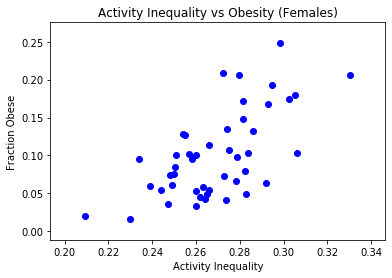

In [246]:
femaledf = genderstratdf[genderstratdf["gender"]=="female"]
femaledf
x = femaledf["steps_gini"]
y = femaledf["obesity_mean"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='blue')
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Obesity (Females)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           obesity_mean   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     19.96
Date:                Sun, 09 May 2021   Prob (F-statistic):           5.47e-05
Time:                        20:58:37   Log-Likelihood:                 70.917
No. Observations:                  46   AIC:                            -137.8
Df Residuals:                      44   BIC:                            -134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4212      0.131     -3.216      0.0

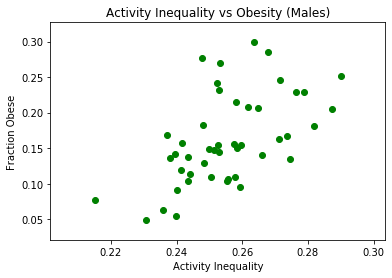

In [247]:
maledf = genderstratdf[genderstratdf["gender"]=="male"]
maledf
x = maledf["steps_gini"]
y = maledf["obesity_mean"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='green')
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Obesity (Males)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [187]:
removehkdf = alldf[alldf["country"] != "Hong Kong"]
removeoutliersdf = removehkdf[removehkdf["country"] != "Saudi Arabia"]
removeoutliersdf

,rank_x,country,activity_inequality,rank_y,fraction_obese,rank_x,steps,rank_y,gender_gap_(m-f)/m,gender_gap(m-f)/m
1,2,China,24.5,1,3.7,2,6189,9,9.8%,9.8
2,3,Sweden,24.6,21,12.6,7,5863,1,4.1%,4.1
3,4,South Korea,24.7,4,5.9,8,5755,11,9.9%,9.9
4,5,Czech Republic,24.8,24,13.1,11,5508,7,7.8%,7.8
5,6,Japan,24.8,2,5.5,4,6010,25,14.9%,14.9
6,7,Singapore,24.9,11,9.3,9,5674,23,14.4%,14.4
7,8,Norway,25.2,25,13.2,18,5246,5,7.6%,7.6
8,9,Ukraine,25.2,6,8.6,3,6107,2,4.8%,4.8
9,10,Netherlands,26.1,14,10.4,23,5110,30,16.3%,16.3
10,11,Spain,26.1,18,12.3,6,5936,16,11.9%,11.9


                            OLS Regression Results                            
Dep. Variable:         fraction_obese   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     55.89
Date:                Sun, 09 May 2021   Prob (F-statistic):           3.06e-09
Time:                        20:56:59   Log-Likelihood:                -119.56
No. Observations:                  44   AIC:                             243.1
Df Residuals:                      42   BIC:                             246.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -52.4839    

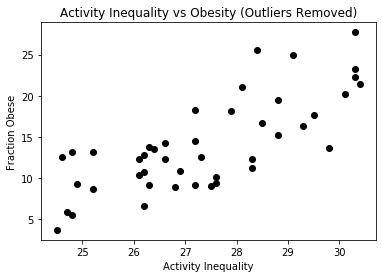

In [245]:
x = removeoutliersdf["activity_inequality"]
y = removeoutliersdf["fraction_obese"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='black')
plt.xlabel("Activity Inequality")
plt.ylabel("Fraction Obese")
plt.title("Activity Inequality vs Obesity (Outliers Removed)")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [189]:
whocsv = pd.read_csv("whodata.csv")
whocsv

,Country,Year,Age Group,allprev,maleprev,Femaleprev,Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adult males aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adult females aged 18+ years (crude estimate) (%)
0,Algeria,2016,18+ years,33.6 [25.5-42.7],26.9 [20.0-35.1],40.2 [31.0-50.3],31.9 [24.1-40.9],25.0 [18.5-33.0],38.8 [29.7-48.8]
1,Andorra,2016,18+ years,38.4 [30.8-46.6],36.8 [29.7-44.6],40.0 [32.0-48.5],42.9 [35.0-51.1],41.5 [34.0-49.4],44.3 [36.0-52.8]
2,Argentina,2016,18+ years,41.6 [33.6-50.0],37.6 [30.4-45.5],45.3 [36.6-54.2],42.3 [34.3-50.7],37.8 [30.5-45.7],46.4 [37.7-55.4]
3,Armenia,2016,18+ years,22.6 [16.4-30.5],23.3 [17.3-30.7],22.1 [15.6-30.3],23.3 [16.9-31.2],23.7 [17.6-31.2],23.0 [16.3-31.3]
4,Australia,2016,18+ years,30.4 [23.7-37.9],27.0 [21.1-34.0],33.6 [26.3-41.9],31.7 [24.9-39.4],28.0 [21.9-35.0],35.4 [27.9-43.8]
...,...,...,...,...,...,...,...,...,...
156,Vanuatu,2016,18+ years,8.0 [5.4-11.6],7.2 [4.9-10.4],8.8 [5.9-12.8],7.3 [5.0-10.7],6.6 [4.5-9.5],8.1 [5.4-11.8]
157,Venezuela (Bolivarian Republic of),2016,18+ years,31.4 [24.0-40.0],29.5 [22.5-37.5],33.3 [25.3-42.4],30.4 [23.1-38.9],28.2 [21.4-36.1],32.6 [24.7-41.6]
158,Viet Nam,2016,18+ years,25.4 [18.9-33.1],19.9 [14.8-26.1],30.6 [22.8-39.6],25.1 [18.7-32.7],19.3 [14.3-25.4],30.5 [22.8-39.5]
159,Zambia,2016,18+ years,22.1 [17.3-26.8],19.1 [14.8-23.3],25.0 [19.7-30.2],20.1 [15.7-24.6],17.0 [13.1-20.9],23.2 [18.1-28.2]


In [190]:
whomodcsv = whocsv[whocsv["Country"].isin(set(alldf["country"]))]
whomodcsv
whomodcsv["maleprev"] = whomodcsv["maleprev"].str.split("[").str[0]
whomodcsv["Femaleprev"] = whomodcsv["Femaleprev"].str.split("[").str[0]
whomodcsv["gendergap"] = whomodcsv["Femaleprev"].astype(float)-whomodcsv["maleprev"].astype(float)
whomodcsv["allprev"] = whomodcsv["allprev"].str.split("[").str[0]
whomodcsv
obesitymoddf = obesitydf[obesitydf["country"].isin(set(whomodcsv["Country"]))]
obesitymoddf
whomodcsv["country"] = whomodcsv["Country"]
whofulldf = whomodcsv.merge(obesitymoddf, how='left', on='country')
whofulldf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Country,Year,Age Group,allprev,maleprev,Femaleprev,Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adult males aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adult females aged 18+ years (crude estimate) (%),gendergap,country,rank,fraction_obese
0,Australia,2016,18+ years,30.4,27.0,33.6,31.7 [24.9-39.4],28.0 [21.9-35.0],35.4 [27.9-43.8],6.6,Australia,40,21.4%
1,Belgium,2016,18+ years,35.7,30.6,40.6,38.6 [31.9-45.7],33.1 [27.2-39.5],43.9 [36.4-51.7],10.0,Belgium,12,9.4%
2,Brazil,2016,18+ years,47.0,40.4,53.3,46.9 [38.8-55.2],40.0 [32.4-48.1],53.4 [44.8-61.9],12.9,Brazil,36,18.3%
3,Canada,2016,18+ years,28.6,25.7,31.4,29.8 [23.0-37.7],26.6 [20.4-33.9],33.0 [25.5-41.4],5.7,Canada,41,22.3%
4,Chile,2016,18+ years,26.6,24.4,28.6,26.9 [19.8-33.9],24.3 [18.2-30.5],29.3 [21.4-37.1],4.2,Chile,28,13.8%
5,China,2016,18+ years,14.1,16.0,12.2,14.4 [10.3-19.7],16.2 [11.9-21.7],12.5 [8.7-17.6],-3.8,China,1,3.7%
6,Denmark,2016,18+ years,28.5,25.7,31.2,30.8 [24.7-37.5],27.8 [22.5-33.9],33.6 [26.9-41.0],5.5,Denmark,23,12.8%
7,Egypt,2016,18+ years,31.0,23.2,38.8,29.9 [22.6-38.2],21.6 [16.0-28.6],38.1 [29.3-47.8],15.6,Egypt,42,23.3%
8,Finland,2016,18+ years,16.6,17.2,16.0,18.7 [14.6-23.6],18.9 [15.0-23.5],18.5 [14.3-23.7],-1.2,Finland,19,12.3%
9,France,2016,18+ years,29.3,24.3,34.0,32.3 [26.1-39.0],26.6 [21.4-32.5],37.5 [30.5-45.1],9.7,France,7,8.9%


                            OLS Regression Results                            
Dep. Variable:         fraction_obese   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     18.94
Date:                Sun, 09 May 2021   Prob (F-statistic):           0.000106
Time:                        17:07:40   Log-Likelihood:                -110.96
No. Observations:                  38   AIC:                             225.9
Df Residuals:                      36   BIC:                             229.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0018      1.249      8.006      0.0

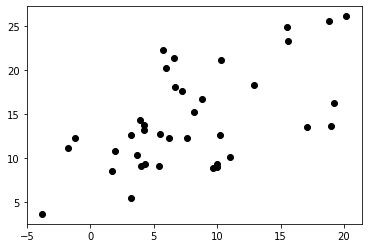

In [191]:
x = whofulldf["gendergap"]
y = whofulldf["fraction_obese"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='black')
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         fraction_obese   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     9.684
Date:                Sun, 09 May 2021   Prob (F-statistic):            0.00363
Time:                        20:10:29   Log-Likelihood:                -114.47
No. Observations:                  38   AIC:                             232.9
Df Residuals:                      36   BIC:                             236.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1002      6.716      5.227      0.0

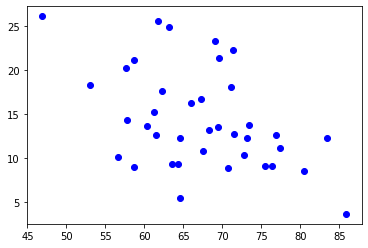

In [222]:
x = 100 - whofulldf["allprev"].astype(str).str.rstrip('%').astype('float')
y = whofulldf["fraction_obese"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='blue')
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [193]:
allmoddf = alldf[alldf["country"].isin(set(whofulldf["country"]))]
whofullerdf = whofulldf.merge(allmoddf, how='left', on='country')
whofullerdf

,Country,Year,Age Group,allprev,maleprev,Femaleprev,Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adult males aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adult females aged 18+ years (crude estimate) (%),gendergap,...,fraction_obese_x,rank_x,activity_inequality,rank_y,fraction_obese_y,rank_x,steps,rank_y,gender_gap_(m-f)/m,gender_gap(m-f)/m
0,Australia,2016,18+ years,30.4,27.0,33.6,31.7 [24.9-39.4],28.0 [21.9-35.0],35.4 [27.9-43.8],6.6,...,21.4%,45,30.4,40,21.4,28,4941,40,25.2%,25.2
1,Belgium,2016,18+ years,35.7,30.6,40.6,38.6 [31.9-45.7],33.1 [27.2-39.5],43.9 [36.4-51.7],10.0,...,9.4%,28,27.6,12,9.4,27,4978,19,12.7%,12.7
2,Brazil,2016,18+ years,47.0,40.4,53.3,46.9 [38.8-55.2],40.0 [32.4-48.1],53.4 [44.8-61.9],12.9,...,18.3%,22,27.2,36,18.3,40,4289,34,19.4%,19.4
3,Canada,2016,18+ years,28.6,25.7,31.4,29.8 [23.0-37.7],26.6 [20.4-33.9],33.0 [25.5-41.4],5.7,...,22.3%,44,30.3,41,22.3,29,4819,38,22.3%,22.3
4,Chile,2016,18+ years,26.6,24.4,28.6,26.9 [19.8-33.9],24.3 [18.2-30.5],29.3 [21.4-37.1],4.2,...,13.8%,15,26.3,28,13.8,20,5204,22,14.2%,14.2
5,China,2016,18+ years,14.1,16.0,12.2,14.4 [10.3-19.7],16.2 [11.9-21.7],12.5 [8.7-17.6],-3.8,...,3.7%,2,24.5,1,3.7,2,6189,9,9.8%,9.8
6,Denmark,2016,18+ years,28.5,25.7,31.2,30.8 [24.7-37.5],27.8 [22.5-33.9],33.6 [26.9-41.0],5.5,...,12.8%,13,26.2,23,12.8,15,5263,28,15.2%,15.2
7,Egypt,2016,18+ years,31.0,23.2,38.8,29.9 [22.6-38.2],21.6 [16.0-28.6],38.1 [29.3-47.8],15.6,...,23.3%,43,30.3,42,23.3,38,4315,17,12.1%,12.1
8,Finland,2016,18+ years,16.6,17.2,16.0,18.7 [14.6-23.6],18.9 [15.0-23.5],18.5 [14.3-23.7],-1.2,...,12.3%,18,26.6,19,12.3,21,5204,8,8.3%,8.3
9,France,2016,18+ years,29.3,24.3,34.0,32.3 [26.1-39.0],26.6 [21.4-32.5],37.5 [30.5-45.1],9.7,...,8.9%,20,26.8,7,8.9,22,5141,10,9.8%,9.8


                            OLS Regression Results                            
Dep. Variable:     gender_gap_(m-f)/m   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     12.59
Date:                Sun, 09 May 2021   Prob (F-statistic):            0.00110
Time:                        20:19:31   Log-Likelihood:                -127.64
No. Observations:                  38   AIC:                             259.3
Df Residuals:                      36   BIC:                             262.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7953      1.938      5.571      0.0

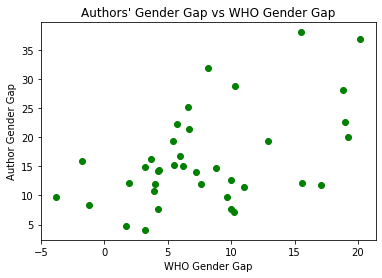

In [224]:
x = whofullerdf["gendergap"]
y = whofullerdf["gender_gap_(m-f)/m"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='green')
plt.title("Authors' Gender Gap vs WHO Gender Gap")
plt.xlabel("WHO Gender Gap")
plt.ylabel("Author Gender Gap")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                allprev   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     11.92
Date:                Sun, 09 May 2021   Prob (F-statistic):            0.00144
Time:                        18:25:07   Log-Likelihood:                -128.75
No. Observations:                  38   AIC:                             261.5
Df Residuals:                      36   BIC:                             264.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0799      9.091      3.969      0.0

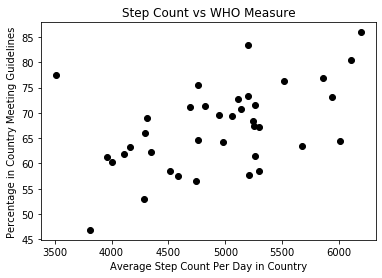

In [214]:
x = whofullerdf["steps"]
y = 100-whofullerdf["allprev"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='black')
plt.xlabel("Average Step Count Per Day in Country")
plt.ylabel("Percentage in Country Meeting Guidelines")
plt.title("Step Count vs WHO Measure")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())

In [196]:
whoobesitycsv = pd.read_csv("obesitywho.csv")
whoobesitycsv

,Country,ObesityPrev2016,ObesityMale2016,ObesityFemale2016,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
1,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
2,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
3,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
4,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela (Bolivarian Republic of),25.6 [21.3-30.2],22.4 [16.4-28.9],28.6 [22.5-35.2],25.2 [21.0-29.5],22.0 [16.2-28.2],28.3 [22.4-34.6],24.8 [20.8-29.0],21.5 [16.0-27.4],27.9 [22.2-34.1],...,14.4 [8.4-21.4],10.3 [6.7-14.6],6.6 [3.2-11.7],14.0 [8.0-21.3],9.9 [6.3-14.3],6.3 [2.9-11.5],13.6 [7.5-21.0],9.6 [5.9-14.1],5.9 [2.7-11.2],13.2 [7.1-20.7]
188,Viet Nam,2.1 [1.4-3.1],1.6 [0.8-2.8],2.6 [1.5-4.2],2.0 [1.3-2.9],1.5 [0.8-2.5],2.4 [1.4-3.9],1.8 [1.2-2.6],1.3 [0.7-2.3],2.3 [1.3-3.6],...,0.2 [0.1-0.6],0.2 [0.1-0.3],0.1 [0.0-0.2],0.2 [0.1-0.5],0.1 [0.1-0.3],0.1 [0.0-0.2],0.2 [0.1-0.5],0.1 [0.0-0.3],0.1 [0.0-0.2],0.2 [0.1-0.5]
189,Yemen,17.1 [13.3-21.3],12.0 [7.3-17.6],22.0 [16.0-28.4],16.5 [12.9-20.5],11.4 [7.0-16.7],21.3 [15.6-27.4],15.9 [12.4-19.6],10.8 [6.7-15.7],20.6 [15.2-26.4],...,4.8 [2.0-9.3],3.1 [1.5-5.7],1.3 [0.4-3.3],4.5 [1.9-9.2],2.9 [1.4-5.6],1.3 [0.3-3.2],4.3 [1.7-9.0],2.8 [1.3-5.4],1.2 [0.3-3.1],4.2 [1.5-8.9]
190,Zambia,8.1 [5.8-10.7],3.6 [1.7-6.5],12.4 [8.5-17.1],7.7 [5.6-10.2],3.4 [1.6-6.1],12.0 [8.2-16.4],7.4 [5.4-9.8],3.2 [1.5-5.7],11.5 [7.9-15.7],...,3.0 [1.3-5.6],1.7 [0.8-3.2],0.5 [0.1-1.5],2.9 [1.2-5.4],1.6 [0.7-3.1],0.5 [0.1-1.4],2.7 [1.1-5.3],1.5 [0.7-3.0],0.5 [0.1-1.4],2.5 [1.0-5.1]


In [197]:
whoobesitydf = whoobesitycsv[whoobesitycsv["Country"].isin(set(alldf["country"]))]
whoobesitydf["ObesityPrev2016"] = whoobesitydf["ObesityPrev2016"].str.split("[").str[0]
whoobesitydf["country"] = whoobesitydf["Country"]
allwhodf = whofullerdf.merge(whoobesitydf, how='left', on='country')
allwhodf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country_x,Year,Age Group,allprev,maleprev,Femaleprev,Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adult males aged 18+ years (crude estimate) (%),Prevalence of insufficient physical activity among adult females aged 18+ years (crude estimate) (%),gendergap,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,Australia,2016,18+ years,30.4,27.0,33.6,31.7 [24.9-39.4],28.0 [21.9-35.0],35.4 [27.9-43.8],6.6,...,12.0 [8.7-15.7],11.0 [8.6-13.8],10.3 [7.0-14.1],11.7 [8.3-15.6],10.8 [8.2-13.5],10.0 [6.6-14.0],11.5 [8.0-15.4],10.5 [7.9-13.4],9.7 [6.2-13.9],11.2 [7.6-15.2]
1,Belgium,2016,18+ years,35.7,30.6,40.6,38.6 [31.9-45.7],33.1 [27.2-39.5],43.9 [36.4-51.7],10.0,...,12.9 [9.1-17.1],10.9 [8.3-13.8],8.9 [5.8-12.8],12.7 [8.8-17.1],10.7 [8.0-13.8],8.7 [5.5-12.6],12.5 [8.5-17.2],10.5 [7.8-13.8],8.4 [5.2-12.6],12.4 [8.2-17.2]
2,Brazil,2016,18+ years,47.0,40.4,53.3,46.9 [38.8-55.2],40.0 [32.4-48.1],53.4 [44.8-61.9],12.9,...,8.3 [5.1-12.6],5.7 [3.8-8.3],3.4 [1.7-6.0],8.0 [4.7-12.5],5.5 [3.5-8.1],3.2 [1.5-5.8],7.6 [4.3-12.2],5.2 [3.3-7.9],3.0 [1.4-5.7],7.3 [4.0-12.0]
3,Canada,2016,18+ years,28.6,25.7,31.4,29.8 [23.0-37.7],26.6 [20.4-33.9],33.0 [25.5-41.4],5.7,...,11.6 [8.0-15.6],10.4 [7.9-13.3],9.4 [6.0-13.5],11.3 [7.7-15.5],10.1 [7.6-13.1],9.1 [5.7-13.3],11.0 [7.3-15.4],9.8 [7.2-13.0],8.8 [5.3-13.2],10.8 [7.0-15.2]
4,Chile,2016,18+ years,26.6,24.4,28.6,26.9 [19.8-33.9],24.3 [18.2-30.5],29.3 [21.4-37.1],4.2,...,15.3 [9.7-22.0],11.9 [8.3-16.2],8.4 [4.5-13.9],14.9 [9.3-21.8],11.5 [7.9-15.9],8.1 [4.1-13.7],14.6 [8.8-21.5],11.2 [7.5-15.7],7.8 [3.8-13.4],14.2 [8.4-21.3]
5,China,2016,18+ years,14.1,16.0,12.2,14.4 [10.3-19.7],16.2 [11.9-21.7],12.5 [8.7-17.6],-3.8,...,0.9 [0.4-1.5],0.5 [0.3-0.9],0.3 [0.1-0.5],0.8 [0.4-1.5],0.5 [0.3-0.9],0.2 [0.1-0.5],0.8 [0.4-1.5],0.5 [0.2-0.9],0.2 [0.1-0.5],0.7 [0.3-1.5]
6,Denmark,2016,18+ years,28.5,25.7,31.2,30.8 [24.7-37.5],27.8 [22.5-33.9],33.6 [26.9-41.0],5.5,...,8.5 [5.4-12.4],7.6 [5.6-10.0],6.8 [4.4-9.8],8.3 [5.2-12.3],7.4 [5.4-9.9],6.5 [4.1-9.6],8.1 [5.0-12.2],7.2 [5.1-9.7],6.3 [3.9-9.3],7.9 [4.8-12.1]
7,Egypt,2016,18+ years,31.0,23.2,38.8,29.9 [22.6-38.2],21.6 [16.0-28.6],38.1 [29.3-47.8],15.6,...,19.3 [12.7-27.1],12.7 [8.7-17.3],5.9 [2.9-10.3],18.9 [12.0-26.9],12.3 [8.2-17.0],5.7 [2.7-10.1],18.4 [11.4-26.7],12.0 [7.8-16.8],5.5 [2.5-9.9],17.9 [10.7-26.6]
8,Finland,2016,18+ years,16.6,17.2,16.0,18.7 [14.6-23.6],18.9 [15.0-23.5],18.5 [14.3-23.7],-1.2,...,8.6 [6.0-11.7],7.5 [5.7-9.7],6.4 [4.0-9.2],8.3 [5.7-11.5],7.2 [5.3-9.4],6.0 [3.7-9.0],8.0 [5.3-11.3],6.9 [5.0-9.2],5.7 [3.4-8.7],7.8 [5.0-11.1]
9,France,2016,18+ years,29.3,24.3,34.0,32.3 [26.1-39.0],26.6 [21.4-32.5],37.5 [30.5-45.1],9.7,...,11.4 [7.2-16.5],9.3 [6.6-12.5],7.3 [4.2-11.4],11.1 [6.9-16.5],9.1 [6.3-12.3],7.0 [3.9-11.2],10.9 [6.6-16.4],8.8 [6.0-12.2],6.7 [3.6-11.0],10.7 [6.3-16.3]


                            OLS Regression Results                            
Dep. Variable:       fraction_obese_x   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     28.97
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.65e-06
Time:                        20:24:47   Log-Likelihood:                -107.77
No. Observations:                  38   AIC:                             219.5
Df Residuals:                      36   BIC:                             222.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.0345      1.864     

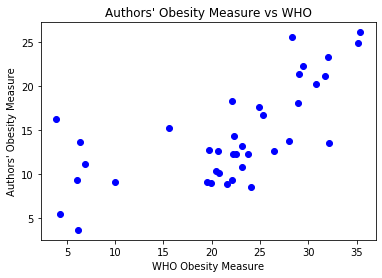

In [231]:
x = allwhodf["ObesityPrev2016"].astype(str).str.rstrip('%').astype('float')
y = allwhodf["fraction_obese_x"].astype(str).str.rstrip('%').astype('float')
plt.scatter(x, y, c='blue')
plt.title("Authors' Obesity Measure vs WHO")
plt.xlabel("WHO Obesity Measure")
plt.ylabel("Authors' Obesity Measure")
model = sm.OLS(y.astype(float), sm.add_constant(x.astype(float))).fit()
print(model.summary())